<a href="https://colab.research.google.com/github/trujoan/identificar-img/blob/main/Identificacion_de_Placas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt update
!apt install tesseract-ocr
!pip3 install pytesseract
!wget https://github.com/tesseract-ocr/tessdata/raw/main/spa.traineddata

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:4 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,389 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,227 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,091 kB]
Ign:11 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:12 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:13 http://security.ubuntu.com/

Acceso permitido
placa: 


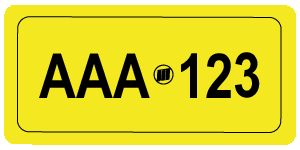

In [ ]:
import cv2
import pytesseract
import os
from google.colab.patches import cv2_imshow
import pandas as pd

contour=""
placa=""
df = pd.read_excel('Base_de_datos.xlsx')

# Se carga la imagen de la placa
image = cv2.imread('/content/placa1.png')

# Se convierte la imagen a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Se aplica blur para reducir el ruido
gray = cv2.blur(gray, (3, 3))

# Se hace la detección de bordes con Canny
canny = cv2.Canny(gray, 150, 200)

# Se dilata la imagen para enfatizar los bordes
canny = cv2.dilate(canny, None, iterations=1)

# Se detectan los contornos en la imagen
contours, hierarchy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Se filtran contornos
for contour in contours: # Changed contour to contours
  area=cv2.contourArea(contour)
  if area > 1000:
    x,y,w,h = cv2.boundingRect(contour)
    aspect_ratio = (w)/h
    if aspect_ratio > 2.4:
      image = gray[y:y +h,x:x +w]
      break

#Se establece la imagen a blanco y negro
ret, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

#se aplica un filtro Gaussiano para suavizar la imagen
placa = cv2.GaussianBlur(thresh, (5, 5), 0)

#Se establece la ruta de Tesseract
os.environ['TESSDATA_PREFIX'] = '/content/'

#Se extrae el texto utilizando Tesseract
text = pytesseract.image_to_string(image, lang='spa', config='--psm 11')
text = text.strip()

#
matches = df[df['Placa'].str.contains(text, case=False)]

if not matches.empty:
    print("Acceso permitido")
else:
    print("Acceso denegado")

#Se muestra el resultado del reconocimiento
print('placa:',text)
cv2_imshow(image)


Saving imagen.jpeg to imagen (1).jpeg
Retira el vehículo:


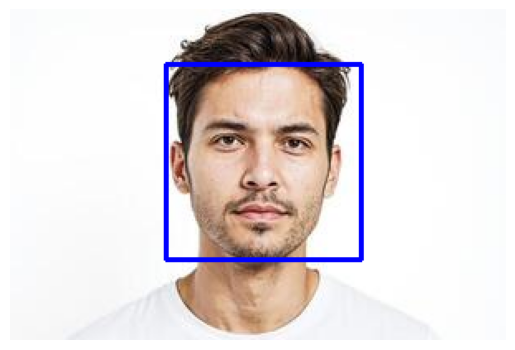

In [ ]:
# Importar librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import requests
from PIL import Image
from io import BytesIO

# Cargar el clasificador de Haar Cascade
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

def detect_faces_in_image(image_path):
    # Cargar la imagen
    img = cv2.imread(image_path)

    # Verificar si la imagen se ha cargado correctamente
    if img is None:
        print(f"Error: No se pudo cargar la imagen desde la ruta: {image_path}")
        return

    # Convertir la imagen a escala de grises
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detectar rostros en la imagen
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Dibujar cuadros delimitadores alrededor de los rostros detectados
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Mostrar la imagen resultante
    print ('Retira el vehículo:')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Ocultar los ejes
    plt.show()

#Subir una imagen desde tu máquina local
uploaded = files.upload()

# Obtener el nombre del archivo subido
for filename in uploaded.keys():
    image_path = filename
    break

# Llamar a la función para detectar rostros en la imagen
detect_faces_in_image(image_path)
